In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pertpy as pt
import scanpy as sc

In [18]:
file_path = "../processed_data/pbmc10k_SEACells_MAGIC.h5ad" 

adata = sc.read(file_path)

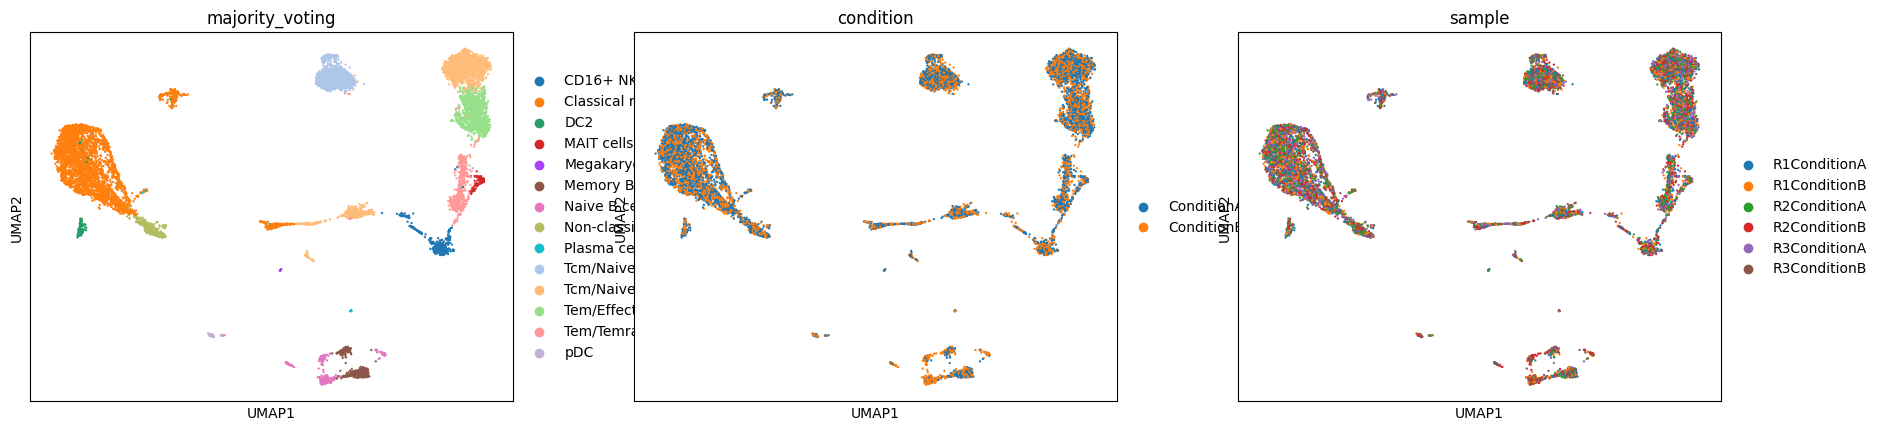

In [19]:
## Simulate experimental condition ##
adata.obs["condition"] = np.random.choice(["ConditionA", "ConditionB"], size=adata.n_obs, p=[0.5,0.5])
# we simulate differential abundance in Naive B cells
DA_cells = adata.obs["majority_voting"] == "Naive B cells"
adata.obs.loc[DA_cells, "condition"] = np.random.choice(["ConditionA", "ConditionB"], size=sum(DA_cells), p=[0.2,0.8])

## Simulate replicates ##
adata.obs["replicate"] = np.random.choice(["R1", "R2", "R3"], size=adata.n_obs)
adata.obs["sample"] = adata.obs["replicate"] + adata.obs["condition"]

sc.pl.umap(adata, color=["majority_voting","condition", "sample"])

In [20]:
milo = pt.tl.Milo()
mdata = milo.load(adata)

In [21]:
mdata['rna']

AnnData object with n_obs × n_vars = 10985 × 14916
    obs: 'pheno_leiden', 'predicted_labels', 'conf_score', 'over_clustering', 'majority_voting', 'SEACell', 'condition', 'replicate', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'SEACells_summary', 'hvg', 'log1p', 'majority_voting_colors', 'neighbors', 'neighbors_30', 'pca', 'pheno_jaccard_q', 'predicted_labels_colors', 'umap', 'condition_colors', 'sample_colors'
    obsm: 'X_magic_pca', 'X_magic_umap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_norm', 'norm_counts', 'raw'
    obsp: 'connectivities', 'distances', 'neighbors_30_connectivities', 'neighbors_30_distances', 'pheno_jaccard_ig'

In [22]:
## Assign cells to neighbourhoods
milo.make_nhoods(mdata['rna'])

In [23]:
## Count cells from each sample in each nhood
milo.count_nhoods(mdata, sample_col="sample")

MuData object with n_obs × n_vars = 10985 × 14916
  2 modalities
    rna:	10985 x 14916
      obs:	'pheno_leiden', 'predicted_labels', 'conf_score', 'over_clustering', 'majority_voting', 'SEACell', 'condition', 'replicate', 'sample', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
      var:	'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
      uns:	'SEACells_summary', 'hvg', 'log1p', 'majority_voting_colors', 'neighbors', 'neighbors_30', 'pca', 'pheno_jaccard_q', 'predicted_labels_colors', 'umap', 'condition_colors', 'sample_colors', 'nhood_neighbors_key'
      obsm:	'X_magic_pca', 'X_magic_umap', 'X_pca', 'X_umap', 'nhoods'
      varm:	'PCs'
      layers:	'log_norm', 'norm_counts', 'raw'
      obsp:	'connectivities', 'distances', 'neighbors_30_connectivities', 'neighbors_30_distances', 'pheno_jaccard_ig'
    milo:	6 x 832
      var:	'index_cell', 'kth_distance'
      uns:	'sample_col'

In [24]:
mdata['rna'].obs.groupby("sample")["pheno_leiden"].nunique()

sample
R1ConditionA    29
R1ConditionB    29
R2ConditionA    29
R2ConditionB    29
R3ConditionA    29
R3ConditionB    29
Name: pheno_leiden, dtype: int64

In [25]:
# milo.da_nhoods(mdata, design="~condition")
milo.da_nhoods(mdata, design="~condition", model_contrasts="conditionConditionA-conditionConditionB")
# milo.da_nhoods(mdata, design="~pheno_leiden", model_contrasts="pheno_leiden4-pheno_leiden2")

In [26]:
milo.build_nhood_graph(mdata)

/home/genos/gmunoz/SCRATCH/miniconda3/envs/milo_env/lib/python3.13/site-packages/anndata/_core/anndata.py:1158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/genos/gmunoz/SCRATCH/miniconda3/envs/milo_env/lib/python3.13/site-packages/anndata/_core/anndata.py:1158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/genos/gmunoz/SCRATCH/miniconda3/envs/milo_env/lib/python3.13/site-packages/anndata/_core/anndata.py:1158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


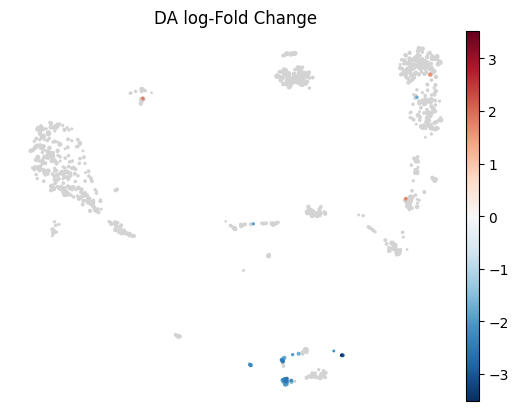

In [27]:
milo.plot_nhood_graph(
    mdata,
    alpha=0.1,  # SpatialFDR level (1%)
    min_size=1,  # Size of smallest dot
    # plot_edges=True,  # Plot edges
)

In [28]:
mdata

MuData object with n_obs × n_vars = 10985 × 14916
  2 modalities
    rna:	10985 x 14916
      obs:	'pheno_leiden', 'predicted_labels', 'conf_score', 'over_clustering', 'majority_voting', 'SEACell', 'condition', 'replicate', 'sample', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
      var:	'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
      uns:	'SEACells_summary', 'hvg', 'log1p', 'majority_voting_colors', 'neighbors', 'neighbors_30', 'pca', 'pheno_jaccard_q', 'predicted_labels_colors', 'umap', 'condition_colors', 'sample_colors', 'nhood_neighbors_key'
      obsm:	'X_magic_pca', 'X_magic_umap', 'X_pca', 'X_umap', 'nhoods'
      varm:	'PCs'
      layers:	'log_norm', 'norm_counts', 'raw'
      obsp:	'connectivities', 'distances', 'neighbors_30_connectivities', 'neighbors_30_distances', 'pheno_jaccard_ig'
    milo:	6 x 832
      obs:	'condition', 'sample'
      var:	'index_cell', 'kth_distance', 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'adjust.method', 'comparison', 'test', 'SpatialFDR', 'Nhood_size'
      uns:	'sample_col', 'nhood'
      varm:	'X_milo_graph'
      varp:	'nhood_connectivities'

In [14]:
# export mdata as h5ad
mdata.write("../processed_data/pbmc10k_SEACells_MAGIC_milo.h5ad")

In [29]:
adata = mdata['rna'].copy()
adata.uns["milo"] = mdata["milo"].copy()

In [31]:
# Save the modified AnnData object
adata.write("../processed_data/pbmc10k_SEACells_MAGIC_milo2.h5ad")

In [34]:
import scanpy as sc

adata = sc.read_h5ad("../processed_data/pbmc10k_SEACells_MAGIC_milo2.h5ad")

In [22]:
adata.obs["pheno_leiden_str"] = adata.obs["pheno_leiden"].astype(str)


In [35]:
sc.tl.rank_genes_groups(adata, groupby="majority_voting", groups=["Classical monocytes"], reference="Tcm/Naive helper T cells", method="wilcoxon")


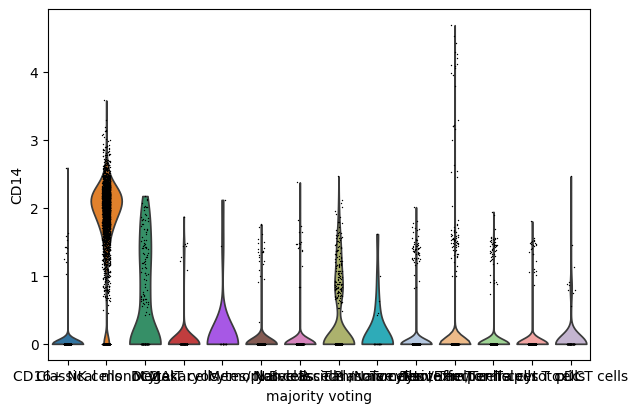

In [40]:
# violin plot for selected gene
selected_gene = "CD14"
sc.pl.violin(adata, keys=selected_gene, groupby="majority_voting")

In [43]:
adata.obs['majority_voting']

index
AAACCCAGTATATGGA-1       Tcm/Naive helper T cells
AAACCCAGTATCGTAC-1            Classical monocytes
AAACCCAGTCGGTGAA-1                     MAIT cells
AAACCCAGTTAGAAAC-1            Classical monocytes
AAACCCAGTTATCTTC-1                 CD16+ NK cells
                                 ...             
TTTGTTGCAATAGGGC-1    Tcm/Naive cytotoxic T cells
TTTGTTGCACAGAGAC-1    Tcm/Naive cytotoxic T cells
TTTGTTGCACAGTCAT-1            Classical monocytes
TTTGTTGTCCTAGCTC-1    Tem/Effector helper T cells
TTTGTTGTCCTATGGA-1        Non-classical monocytes
Name: majority_voting, Length: 10985, dtype: category
Categories (14, object): ['CD16+ NK cells', 'Classical monocytes', 'DC2', 'MAIT cells', ..., 'Tcm/Naive helper T cells', 'Tem/Effector helper T cells', 'Tem/Temra cytotoxic T cells', 'pDC']

In [30]:
import scanpy as sc

adata = sc.read_h5ad("../processed_data/pbmc10k_SEACells_MAGIC_milo2.h5ad")

In [31]:
adata

AnnData object with n_obs × n_vars = 10985 × 14916
    obs: 'pheno_leiden', 'predicted_labels', 'conf_score', 'over_clustering', 'majority_voting', 'SEACell', 'condition', 'replicate', 'sample', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'SEACells_summary', 'condition_colors', 'hvg', 'log1p', 'majority_voting_colors', 'milo', 'neighbors', 'neighbors_30', 'nhood_neighbors_key', 'pca', 'pheno_jaccard_q', 'predicted_labels_colors', 'sample_colors', 'umap'
    obsm: 'X_magic_pca', 'X_magic_umap', 'X_pca', 'X_umap', 'nhoods'
    varm: 'PCs'
    layers: 'log_norm', 'norm_counts', 'raw'
    obsp: 'connectivities', 'distances', 'neighbors_30_connectivities', 'neighbors_30_distances', 'pheno_jaccard_ig'

In [ ]:
# set adata.var index to adata.var$gene_ids and adata.var$feature_name to adata.var index

adata.var['gene_ids'] = adata.var.index
adata.var.index = adata.var["feature_name"].to_list()
adata.var['gene_name'] = adata.var.index

In [29]:
# get CD3E and CD46 gene ids

cd3_gene_ids = adata.var[adata.var['gene_name'] == 'CD3E']['gene_ids'].tolist()
cd46_gene_ids = adata.var[adata.var['gene_name'] == 'CD46']['gene_ids'].tolist()

print("CD3E gene ids:", cd3_gene_ids)
print("CD46 gene ids:", cd46_gene_ids)

CD3E gene ids: ['ENSG00000198851']
CD46 gene ids: ['ENSG00000117335']


In [25]:
# save

adata.write("../processed_data/GSE130973_SEACells_MAGIC2.h5ad")